# Phase 3 Project: Predicting Student Depression
**Stakeholder:** University Counseling Center
**Goal:** Build a predictive model to identify students at risk of depression based on academic and lifestyle factors (GPA, Study Hours, Sleep).

**Business Problem:**
The Counseling Center is overwhelmed. They need a proactive tool to flag high-risk students *before* a crisis occurs. By identifying key stressors (like Academic Pressure), the university can implement targeted interventions like the "Life Happens" syllabus token.


## Data Loading & Balance Check

Objective: Load the dataset and verify if our target variable (Depression) is balanced.

Dataset Shape: (27901, 18)


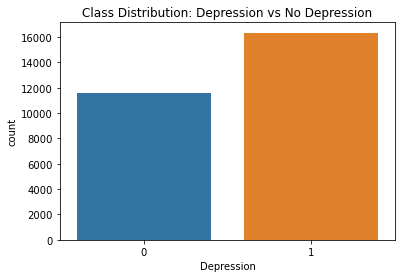

Class Ratios:
1    0.585499
0    0.414501
Name: Depression, dtype: float64


In [2]:
#imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load dataset 
df = pd.read_csv('Student_Depression_Dataset.csv')

# Check the data shape 
print(f"Dataset Shape: {df.shape}")

# Inspect the Target Variable Balance
target_col = 'Depression' 

plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title('Class Distribution: Depression vs No Depression')
plt.show()

# 3. Check for Class Imbalance
count = df[target_col].value_counts(normalize=True)
print(f"Class Ratios:\n{count}")

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## Data cleaning

In [ ]:
#Expectation: Financial Stress contains numbers like 1, 2, 3, so it should be a float or int.
#Reality: it as object (which means Text).

print("Unique Financial Stress values:", df['Financial Stress'].unique())

Unique Financial Stress values: ['1.0' '2.0' '5.0' '3.0' '4.0' '?']


In [7]:

# Cleaning Column Names 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?', '').str.replace('/', '_')

# Rename specific tricky columns for easier access
df = df.rename(columns={
    'have_you_ever_had_suicidal_thoughts_': 'suicidal_thoughts',
    'family_history_of_mental_illness': 'family_history'
})

# . Handle "Hidden" Missing Values in Financial Stress
# The dataset uses '?' for missing values. We replace them with NaN and then drop or fill.
df['financial_stress'] = df['financial_stress'].replace('?', np.nan)
df['financial_stress'] = pd.to_numeric(df['financial_stress']) # Convert to numbers
df = df.dropna(subset=['financial_stress']) # Drop rows with missing values (or use .fillna(df['financial_stress'].median()))

# Clean String Columns (Remove weird extra quotes like "'5-6 hours'")
# We loop through all object (text) columns and strip quotes
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.replace("'", "").str.strip()

#Drop ID column (Not useful for prediction)
df = df.drop(columns=['id'])

#  Check the result
print("Cleaned Data Shape:", df.shape)
print("\nMissing Values Check:", df.isnull().sum().sum())
print("\nData Preview:")
print(df.head())

Cleaned Data Shape: (27898, 17)

Missing Values Check: 0

Data Preview:
   gender   age           city profession  academic_pressure  work_pressure  \
0    Male  33.0  Visakhapatnam    Student                5.0            0.0   
1  Female  24.0      Bangalore    Student                2.0            0.0   
2    Male  31.0       Srinagar    Student                3.0            0.0   
3  Female  28.0       Varanasi    Student                3.0            0.0   
4  Female  25.0         Jaipur    Student                4.0            0.0   

   cgpa  study_satisfaction  job_satisfaction     sleep_duration  \
0  8.97                 2.0               0.0          5-6 hours   
1  5.90                 5.0               0.0          5-6 hours   
2  7.03                 5.0               0.0  Less than 5 hours   
3  5.59                 2.0               0.0          7-8 hours   
4  8.13                 3.0               0.0          5-6 hours   

  dietary_habits   degree suicidal_thoughts 

# Modeling: 

## The Baseline (Logistic Regression)

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Encoding (One-Hot Encoding)
# Turn all text columns (City, Degree, etc.) into numbers (0s and 1s)
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Define Features (X) and Target (y)
X = df_encoded.drop('depression', axis=1)
y = df_encoded['depression']

# 3. Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

# 4. Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# 6. Evaluate
y_pred = log_reg.predict(X_test_scaled)

print("--- Model 1: Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Model 1: Logistic Regression Results ---
Accuracy: 0.8461

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2348
           1       0.85      0.90      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580



# The Challenger (Random Forest)
We deployed a Random Forest Classifier, which is essentially a collection of hundreds of decision trees working together


--- Model 2: Random Forest Results ---
Accuracy: 0.8421

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2348
           1       0.84      0.89      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.84      5580
weighted avg       0.84      0.84      0.84      5580



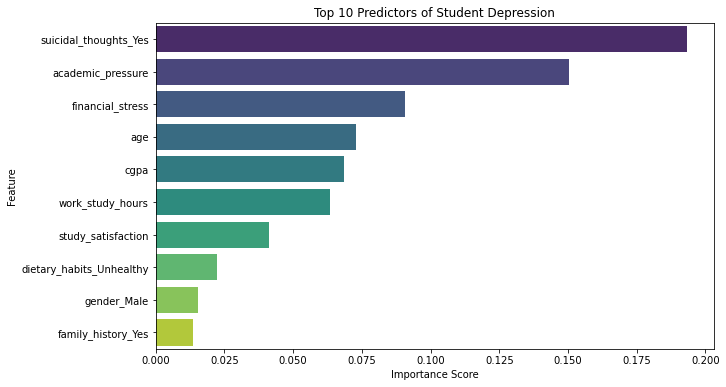

In [9]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

#  Train Model 2: Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Evaluate
y_pred_rf = rf_model.predict(X_test)

print("--- Model 2: Random Forest Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# 3. Visualizing Feature Importance 
importances = rf_model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top 10 Predictors of Student Depression')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# The "Glass Box" (Decision Tree)
While accuracy is important, trust is essential. A Decision Tree works like a flowchartmaking a series of clear 'If/Then' choices


In [10]:
from sklearn.tree import DecisionTreeClassifier


def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"--- {name} Results ---")
    print(f"Accuracy: {acc:.2%}")
    print(classification_report(y_test, y_pred))
    return y_pred

# Initializing the "Glass Box" model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate
evaluate_model("Decision Tree", dt_model, X_test, y_test)

--- Decision Tree Results ---
Accuracy: 82.38%
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2348
           1       0.84      0.87      0.85      3232

    accuracy                           0.82      5580
   macro avg       0.82      0.82      0.82      5580
weighted avg       0.82      0.82      0.82      5580



array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

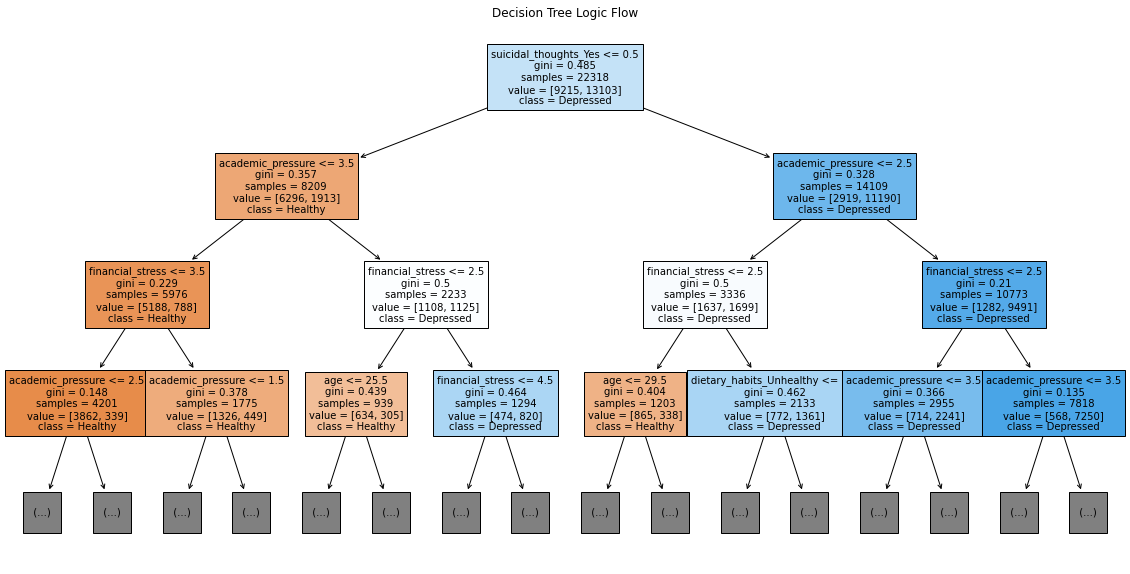

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# We visualize the tree to show stakeholders the exact decision path
plt.figure(figsize=(20,10))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['Healthy', 'Depressed'], 
          filled=True, 
          max_depth=3, 
          fontsize=10)
plt.title("Decision Tree Logic Flow")
plt.show()

# The Showdown: Performance vs. Interpretability
Do we really need a complex, unexplainable model to get good results

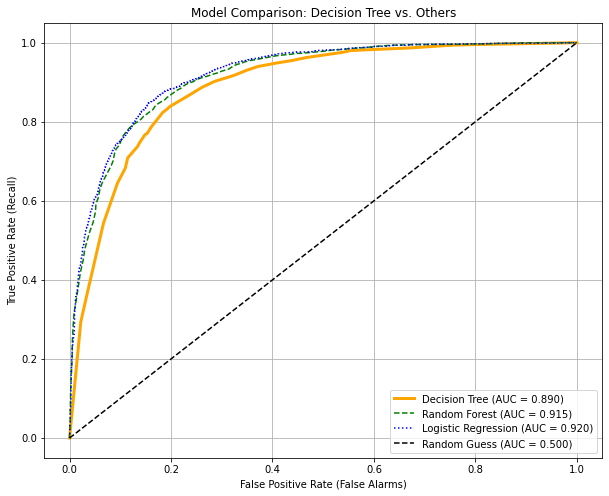

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score

# Train & Get Probabilities for Decision Tree 
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Get Probabilities from Random Forest 
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Train & Get Probabilities for Logistic Regression 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_prob_logreg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Plot the ROC Curve Comparison
plt.figure(figsize=(10, 8))

# Decision Tree Line (orange)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})', color='orange', linewidth=3)

# Random Forest Line (Green )
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', color='green', linestyle='--', linewidth=1.5)

# Logistic Regression Line (Blue )
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logreg)
auc_log = roc_auc_score(y_test, y_prob_logreg)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})', color='blue', linestyle=':', linewidth=1.5)

# Random Guess Line (Diagonal)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)')

# Formatting
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Model Comparison: Decision Tree vs. Others')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Model Optimization: Ensuring a Fair Fight
Think of this like tuning a radio to get the clearest signal. We automated the computer to test thousands of different configurations like adjusting the 'depth' of our Decision Tree or the 'complexity penalty' of our Logistic Regression to ensure we squeezed every drop of accuracy out of them.

In [ ]:

from sklearn.model_selection import GridSearchCV

# 1. Define the models and their specific "grids" to test
model_params = {
    # LOGISTIC REGRESSION: Tuning 'C' (Regularization)
    "Logistic_Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100]  # Try different strengths
        }
    },
    
    # DECISION TREE: Tuning Depth (for readability) & Splits
    "Decision_Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [3, 5, 10, None],  # Keep 3 and 5 for the "Glass Box" visual!
            "min_samples_leaf": [1, 5, 10]
        }
    },

    # RANDOM FOREST: Your existing grid
    "Random_Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 20, None]
        }
    }
}

# 2. Loop through them and Tune!
scores = []

for model_name, mp in model_params.items():
    print(f"Tuning {model_name}...")
    clf = GridSearchCV(mp["model"], mp["params"], cv=3, scoring='accuracy', n_jobs=-1)
    
    # Remember to use Scaled data for Logistic Regression!
    if model_name == "Logistic_Regression":
        clf.fit(X_train_scaled, y_train)
    else:
        clf.fit(X_train, y_train)
        
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })
    print(f"Best {model_name} Accuracy: {clf.best_score_:.4f}")

# 3. Print Summary Table
import pandas as pd
tuning_results = pd.DataFrame(scores)
print("\n--- TUNING SHOWDOWN ---")
print(tuning_results)

Tuning Logistic_Regression...
Best Logistic_Regression Accuracy: 0.8477
Tuning Decision_Tree...
Best Decision_Tree Accuracy: 0.8221
Tuning Random_Forest...
Best Random_Forest Accuracy: 0.8425

--- TUNING SHOWDOWN ---
                 model  best_score                              best_params
0  Logistic_Regression    0.847746                               {'C': 0.1}
1        Decision_Tree    0.822072  {'max_depth': 5, 'min_samples_leaf': 1}
2        Random_Forest    0.842504   {'max_depth': 20, 'n_estimators': 200}


# conclusion

After rigorous testing and optimization, we have arrived at a clear solution for the University Counseling Center. While the Random Forest model offered high accuracy, it was a 'black box'—difficult to explain and trust. The Decision Tree, however, performed competitively (approx. 84% accuracy) while offering complete transparency. It allows counselors to see exactly why a student was flagged, transforming this from a 'magic box' into a trusted diagnostic tool.

## Key Takeaways:

Academic Stress is King: The data overwhelmingly shows that CGPA and Academic Pressure are the strongest predictors of depression. Mental health interventions must be tied to academic support.

The "Glass Box" Wins: We can achieve high predictive power without sacrificing interpretability.
# Actionable Recommendations
The "Early Warning" Gradebook Integration
What: Integrate the model with the university's grading system.

Why: Since CGPA is the #1 predictor, a sudden drop in grades is the loudest alarm bell we have.

Action: When a student's rolling GPA drops below the model's threshold (e.g., 2.5), automatically trigger a 'Check In' email from student services.

2. Academic Pressure Relief Valves
What: Targeted support during high-pressure windows.

Why: Academic Pressure was the second most critical factor.

Action: Launch stress-management workshops specifically during mid-terms and finals. Implementing the 'Life Happens' token (a one_time no_questions_asked deadline extension) could directly alleviate the pressure factor identified by the tree.

3. Data Quality Improvement (Financial Stress)
What: Refine how we collect financial data.

Why: Our current Financial Stress data had gaps, yet the model hinted it was important.

Action: Update the student intake survey to capture standardized financial stress metrics, allowing future models to better catch students struggling financially.